## Lead Scoring Case Study by X Education
#### Requirement :
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Importing Libraries and Lead Data:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [7]:
lead_data = pd.read_csv(r"C:\Users\KGrover\Desktop\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Inspection

In [8]:
# Checking data shape
lead_data.shape

(9240, 37)

In [9]:
#Checking datatype
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### All of the variables' datatypes appear to be acceptable, but if anything needs to be changed, it will be done later.
#### As seen above, there are numerous variables with missing values that need to be addressed.

In [10]:
# Checking numerical variable
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Preparation

In [11]:
# First we will check for the missing values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
# Checking the percentage of missing values
round(lead_data.isnull().sum()/lead_data.shape[0]*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### As we can see, variables related to "Asymmetrique" are messing with the percentage of 45, and "Lead Quality" has 51% of its values missing.If we were to manipulate the data in any way with such a large missing value, the analysis might be misled.Therefore, dropping such variable would be a better option.

#### Let's conduct some analysis of these variables before dropping.

In [16]:
#  Checking missing values columns with percentage
round(lead_data.isnull().sum()/lead_data.shape[0]*100,2)[round(lead_data.isnull().sum()/lead_data.shape[0]*100,2)>0.00]

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64

In [17]:
# Checking missing values columns
lead_data.isnull().sum()[round(lead_data.isnull().sum()/lead_data.shape[0]*100,2)>0.00].index

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [18]:
# lets have look for lead quality variable as per variable defination 
# lead quality ,Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
# So this is something called intution and filled by sales team not filled by target.
# lets look the categories in this variable
lead_data['Lead Quality'].value_counts(normalize=True)*100

Might be             34.875922
Not Sure             24.413146
High in Relevance    14.241002
Worst                13.436173
Low in Relevance     13.033758
Name: Lead Quality, dtype: float64

As we can see we have 5 categories and none of category give such intution to use it to manipulate null values.

Apart from this lead quality is dependent on other variable as said based on which employee intuitively assign category which is filled by sales team not filled by target.

Hence we can safely drop 'Lead Quality' column .

In [19]:
# Checking for 'Asymmetrique' variables before dropping them.
lead_data['Asymmetrique Activity Index'].value_counts(normalize=True)*100

02.Medium    76.443648
01.High      16.348068
03.Low        7.208284
Name: Asymmetrique Activity Index, dtype: float64

In [20]:
lead_data['Asymmetrique Activity Score'].value_counts(normalize=True)*100

14.0    35.264835
15.0    25.746714
13.0    15.432099
16.0     9.299084
17.0     6.949423
12.0     3.902828
11.0     1.891677
10.0     1.135006
9.0      0.179211
18.0     0.099562
8.0      0.079650
7.0      0.019912
Name: Asymmetrique Activity Score, dtype: float64

<Font color='blue'>
We can see there are three category in 'Asymmetrique Activity Index' and score range from 0.7 to 18.0.
As per variable defination Asymmetrique variables are an index and score assigned to each customer based on their activity and their profile.

Basically its dependent of other variable like TotalVisits', 'Page Views Per Visit', 'Last Activity' and so on and this is filled by sales team not filled by target.

These variables are missing around 45% ,hence no point of treating it as its depend on other variables and treating with such huge missing values could mislead the analysis.

## Dropping columns 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Lead Quality'

In [21]:
lead_data.drop([ 'Asymmetrique Activity Index',
           'Asymmetrique Profile Index','Asymmetrique Activity Score',
           'Asymmetrique Profile Score','Lead Quality'],1,inplace=True)

In [22]:
# Checking data shape
lead_data.shape

(9240, 32)

In [24]:
# We have now removed 5 columns, lets check other missing values.
round(lead_data.isnull().sum()/lead_data.shape[0]*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [25]:
# Checking Tag variable as this it has 36% of missing values.
lead_data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

<Font color='blue'>The customer's current status as a lead or not is contained in the Tags variable, as can be seen.Because it is based on employee intuition and is filled by the sales team rather than the target, it is therefore not useful. Hence remove this variable.

In [26]:
# Dropping Tags variable
lead_data.drop('Tags',1,inplace=True)

In [27]:
# Checking data shape
lead_data.shape

(9240, 31)

In [28]:
# Checking missing values after droping Tags variable.
round(lead_data.isnull().sum()/lead_data.shape[0]*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [29]:
# Checking lead profile having missing value of 29.32
round(lead_data['Lead Profile'].value_counts(normalize=True)*100,2)

Select                         63.48
Potential Lead                 24.70
Other Leads                     7.46
Student of SomeSchool           3.69
Lateral Student                 0.37
Dual Specialization Student     0.31
Name: Lead Profile, dtype: float64

In [30]:
# Checking 'How did you hear about X Education' having missing value of 23.89
round(lead_data['How did you hear about X Education'].value_counts(normalize=True)*100,2)

Select                   71.70
Online Search            11.49
Word Of Mouth             4.95
Student of SomeSchool     4.41
Other                     2.64
Multiple Sources          2.16
Advertisements            1.00
Social Media              0.95
Email                     0.37
SMS                       0.33
Name: How did you hear about X Education, dtype: float64

##### So Far: 
<Font color='blue'>
1- As we can see both the varibales having high missing values along with high number of Select category data in both variables.<br>
2- This select is option which potentially lead hasn't selected any option which turn to be in select instead of other categories.<br>
3- Because of less data to give any insight from this two variable better to drop this two variable.

In [31]:
# Dropping 'How did you hear about X Education' and 'Lead Profile'
lead_data.drop(['Lead Profile','How did you hear about X Education'],1,inplace=True)

In [32]:
# Checking data shape
lead_data.shape

(9240, 29)

In [33]:
# Checking missing values again 
round(lead_data.isnull().sum()/lead_data.shape[0]*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

<Font color='blue'>
As we have seen in categorical variable there is Select category which should be treated as missing values as this wasn't filled by lead. Replace this select option as missing value.

In [35]:
lead_data.replace('Select',np.NaN,inplace=True)

In [36]:
# look for missing value again 
round(lead_data.isnull().sum()/lead_data.shape[0]*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

###### We can see missing value % has increase after replacing Select with missing value.


In [37]:
# Checking 'What is your current occupation' as this could be significant variable in further analysis
round(lead_data['What is your current occupation'].value_counts(normalize=True)*100,2)

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64

<Font color='blue'>
As we can see data for variable occupation is highly skewed towards one category 'Unemployed' with 85.50% of visitors are Unemployed.<br>
    We are missing around 29.11% of data for this variable and this variable could be significant hence lets try  imputation if we can do.

In [38]:
# Setting display full columns
pd.set_option("display.max_columns", None)

In [40]:
# Checking all coulmns for missing value of variable 'What is your current occupation'
lead_data[lead_data['What is your current occupation'].isnull()].head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,No,No,No,No,No,No,No,No,No,No,Thane & Outskirts,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,NaN,NaN,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Email Opened
16,3abb7c77-1634-4083-9a9f-861068220611,660540,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified


Lets try to find relation between missing values of occupation variable with other variables

In [41]:
# Relation with 'Specialization' variable
# No such relation found with missing variable
lead_data[lead_data['What is your current occupation'].isnull()]['Specialization'].value_counts()

Finance Management                   214
Human Resource Management            172
Marketing Management                 160
Operations Management                108
Business Administration               89
IT Projects Management                88
Supply Chain Management               71
Banking, Investment And Insurance     69
Travel and Tourism                    53
Media and Advertising                 41
International Business                40
Healthcare Management                 34
E-COMMERCE                            31
Retail Management                     22
Hospitality Management                21
Services Excellence                   15
Rural and Agribusiness                15
E-Business                            14
Name: Specialization, dtype: int64

In [42]:
# Checking with target variable 'Converted'
lead_data[lead_data['What is your current occupation'].isnull()]['Converted'].value_counts(normalize=True)*100

0    86.245353
1    13.754647
Name: Converted, dtype: float64

In [43]:
lead_data[lead_data['Converted']==0]['What is your current occupation'].isnull().sum()

2320

In [44]:
lead_data[lead_data['Converted']==1]['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              76.496396
Working Professional    20.275776
Student                  2.444375
Other                    0.313381
Housewife                0.313381
Businessman              0.156691
Name: What is your current occupation, dtype: float64

<Font color='blue'>
    We can see that 86% of missing values in dataset wasn't converted and only around 14% was converted.<br>
    Lets create another category to imput missing value as 'Unknown' to keep this variable for future analysis.

In [46]:
# Replacing missing values with 'Unknown' category
lead_data['What is your current occupation']=lead_data['What is your current occupation'].fillna('Unknow')

In [47]:
# Checking missing values
lead_data['What is your current occupation'].isnull().sum()

0

In [48]:
# Checking variable 'What matters most to you in choosing a course'.
round(lead_data['What matters most to you in choosing a course'].value_counts(normalize=True)*100,2)

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64

<Font color='blue'>
    As we can see 'Better Career Prospects' has quite higher percentage for choosing a course which means data is not  
    balanced and skewed one side .<br>
    Although this would not add benifit in analysis as it has 29% of missing values and if we do impute with 'Better       Career Prospects' would not add any weighted to analysis.<br>
    Hence its better to remove this column.

In [49]:
# Dropping 'What matters most to you in choosing a course' variable.
lead_data.drop('What matters most to you in choosing a course',1,inplace=True)

In [51]:
# Checking the remaining missing values
round(lead_data.isnull().sum()/lead_data.shape[0]*100,2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
Specialization                              36.58
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00


In [52]:
# Checking 'City' column
round(lead_data['City'].value_counts(normalize=True)*100)

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [53]:
# Checking missing city corresponds to which country
round((lead_data[lead_data['City'].isnull()]['Country'].value_counts())/lead_data['City'].isnull().sum()*100,2)

India                   42.35
United States            0.49
United Arab Emirates     0.25
Singapore                0.19
unknown                  0.14
United Kingdom           0.08
Asia/Pacific Region      0.05
Sweden                   0.05
Qatar                    0.05
Australia                0.05
Sri Lanka                0.03
Russia                   0.03
Canada                   0.03
Ghana                    0.03
Italy                    0.03
Oman                     0.03
Uganda                   0.03
Hong Kong                0.03
South Africa             0.03
China                    0.03
Name: Country, dtype: float64

In [54]:
# Checking how many of both City and Country is common missing
lead_data[(lead_data['City'].isnull()) & (lead_data['Country'].isnull())]['City'].shape[0]

2055

In [55]:
# Calculating percentange of common missing value in City and Country with total missing in City
round((lead_data[(lead_data['City'].isnull()) & (lead_data['Country'].isnull())]['City'].shape[0]/(lead_data['City'].isnull().sum())*100))

56

In [56]:
# Check missing city with target variable
lead_data[lead_data['City'].isnull()]['Converted'].value_counts(normalize=True)*100

0    65.739984
1    34.260016
Name: Converted, dtype: float64

In [57]:
lead_data.groupby(['City','Converted'])['Converted'].count()

City                         Converted
Mumbai                       0            1913
                             1            1309
Other Cities                 0             410
                             1             276
Other Cities of Maharashtra  0             256
                             1             201
Other Metro Cities           0             225
                             1             155
Thane & Outskirts            0             414
                             1             338
Tier II Cities               0              49
                             1              25
Name: Converted, dtype: int64

<font color='blue'>
    Hence we can say almost 40% of data is missing in City column and it would be wise decision to drop this variable.

In [58]:
#As we can see 56% of common missing value in city and Country.
#City could be significant variable .Hence lets drop this variable.
lead_data.drop('City',1,inplace=True)

In [59]:
# Check for country columns as well
# Checking unique values
round(lead_data['Country'].value_counts(normalize=True)*100,2)


India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Hong Kong                0.10
Bahrain                  0.10
Oman                     0.09
France                   0.09
unknown                  0.07
South Africa             0.06
Nigeria                  0.06
Germany                  0.06
Kuwait                   0.06
Canada                   0.06
Sweden                   0.04
China                    0.03
Asia/Pacific Region      0.03
Uganda                   0.03
Bangladesh               0.03
Italy                    0.03
Belgium                  0.03
Netherlands              0.03
Ghana                    0.03
Philippines              0.03
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

<Font color='blue'>
    Country variable has lots of categories and Skewed one side which potentially would not add benifit to the EDA as India has highest percentage.<br>
    Hence lets drop this variable.

In [60]:
# Dropping Country variable
lead_data.drop('Country',1,inplace=True)

In [61]:
# Check remaining missing values
round(lead_data.isnull().sum()/lead_data.shape[0]*100,2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                              36.58
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


In [62]:
# Checking  variable 'Specialization '
round(lead_data['Specialization'].value_counts(normalize=True)*100)

Finance Management                   17.0
Human Resource Management            14.0
Marketing Management                 14.0
Operations Management                 9.0
Business Administration               7.0
IT Projects Management                6.0
Supply Chain Management               6.0
Banking, Investment And Insurance     6.0
Travel and Tourism                    3.0
Media and Advertising                 3.0
International Business                3.0
Healthcare Management                 3.0
Hospitality Management                2.0
E-COMMERCE                            2.0
Retail Management                     2.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   1.0
Name: Specialization, dtype: float64

In [63]:
# In this varible we can see data is not skwed and imputation with mode would mislead the analysis as missisng value is 36.5.
# This variable would be significant in analysis ,hence lets create another category as 'Unknown' for missing variable to keep this variable.
# Replacing missing values with 'Unknown' category
lead_data['Specialization']=lead_data['Specialization'].fillna('Unknown')

In [64]:
# Check remaining missing values
round(lead_data.isnull().sum()/lead_data.shape[0]*100,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [65]:
# Check remaining missing variables.
lead_data[['TotalVisits','Page Views Per Visit','Last Activity','Lead Source']].head()

,TotalVisits,Page Views Per Visit,Last Activity,Lead Source
0,0.0,0.0,Page Visited on Website,Olark Chat
1,5.0,2.5,Email Opened,Organic Search
2,2.0,2.0,Email Opened,Direct Traffic
3,1.0,1.0,Unreachable,Direct Traffic
4,2.0,1.0,Converted to Lead,Google


In [66]:
# As we can see last activity is variable filled by Sales team so it would not help in model building.
# Better to drop this variable.
lead_data.drop('Last Activity',1,inplace=True)

In [67]:
# Check remaining missing values
round(lead_data.isnull().sum()/lead_data.shape[0]*100,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

In [68]:
# Check Lead Source
lead_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

<font color='blue'>
    As we can see the missing % is very low and Google lead source has high frequency.Hence we can use mode to impute the 
    missing value.<br>
    Replacing 'Google' with missing values

In [69]:
# Replacing 'Google' with missing values.
lead_data['Lead Source'].replace(np.NaN,'Google',inplace=True)

In [70]:
# Checking missing values
round(lead_data.isnull().sum()/lead_data.shape[0]*100,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

In [71]:
# Check 'Total Time Spent on Website' variable
lead_data[['TotalVisits','Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


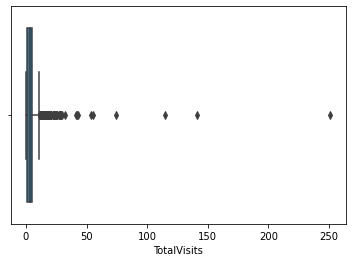

In [72]:
# We can see TotalVisit variable seems to have an outlier as there is huge difference in 75% to max value .
# Plot boxplot to check further
sns.boxplot(lead_data['TotalVisits'],orient="v")
plt.show()

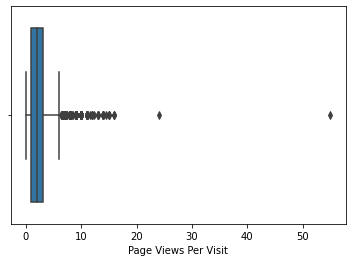

In [74]:
# For Page Views Per Visit
sns.boxplot(lead_data['Page Views Per Visit'],orient="v")
plt.show()

In [75]:
# This can be clearly seen there are outliers in both variables, so imputing with mean would not be fair.
# Hence median would be best for imputation.
# Impute missing values with median
lead_data['TotalVisits'].fillna(lead_data['TotalVisits'].median(),inplace=True)

In [76]:
# For 'Page Views Per Visit'
lead_data['Page Views Per Visit'].fillna(lead_data['Page Views Per Visit'].median(),inplace=True)

In [77]:
# Checking missing value
lead_data.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

<font color='blue'>
    Now we have no missing values .<br>
    Look for other variables which would not add any weighted to our analysis.<br>
    We can drop Prospect ID as this is id and have no significance ,Last Notable Activity can be dropped as well .This is 
    filled by sales team hence can be dropped.

In [78]:
# Dropping Prospect ID and Last Notable Activity.
lead_data.drop(['Last Notable Activity','Prospect ID'],1,inplace=True)

In [79]:
# Checking data
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Unknown,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Unknown,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,No,Yes
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Unknown,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No


In [80]:
# Checking shape
lead_data.shape

(9240, 23)

In [81]:
# Creating new variable for list of categorical variable,which will be used to check unqiue value in each categorical variable.
categorical_var=lead_data.select_dtypes(include=['object']).columns.tolist()

In [82]:
# Checking the number of unique values in each columns
lead_data.nunique() 

Lead Number                                 9240
Lead Origin                                    5
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Specialization                                19
What is your current occupation                7
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply Chain Content              1
Get updates on DM Co

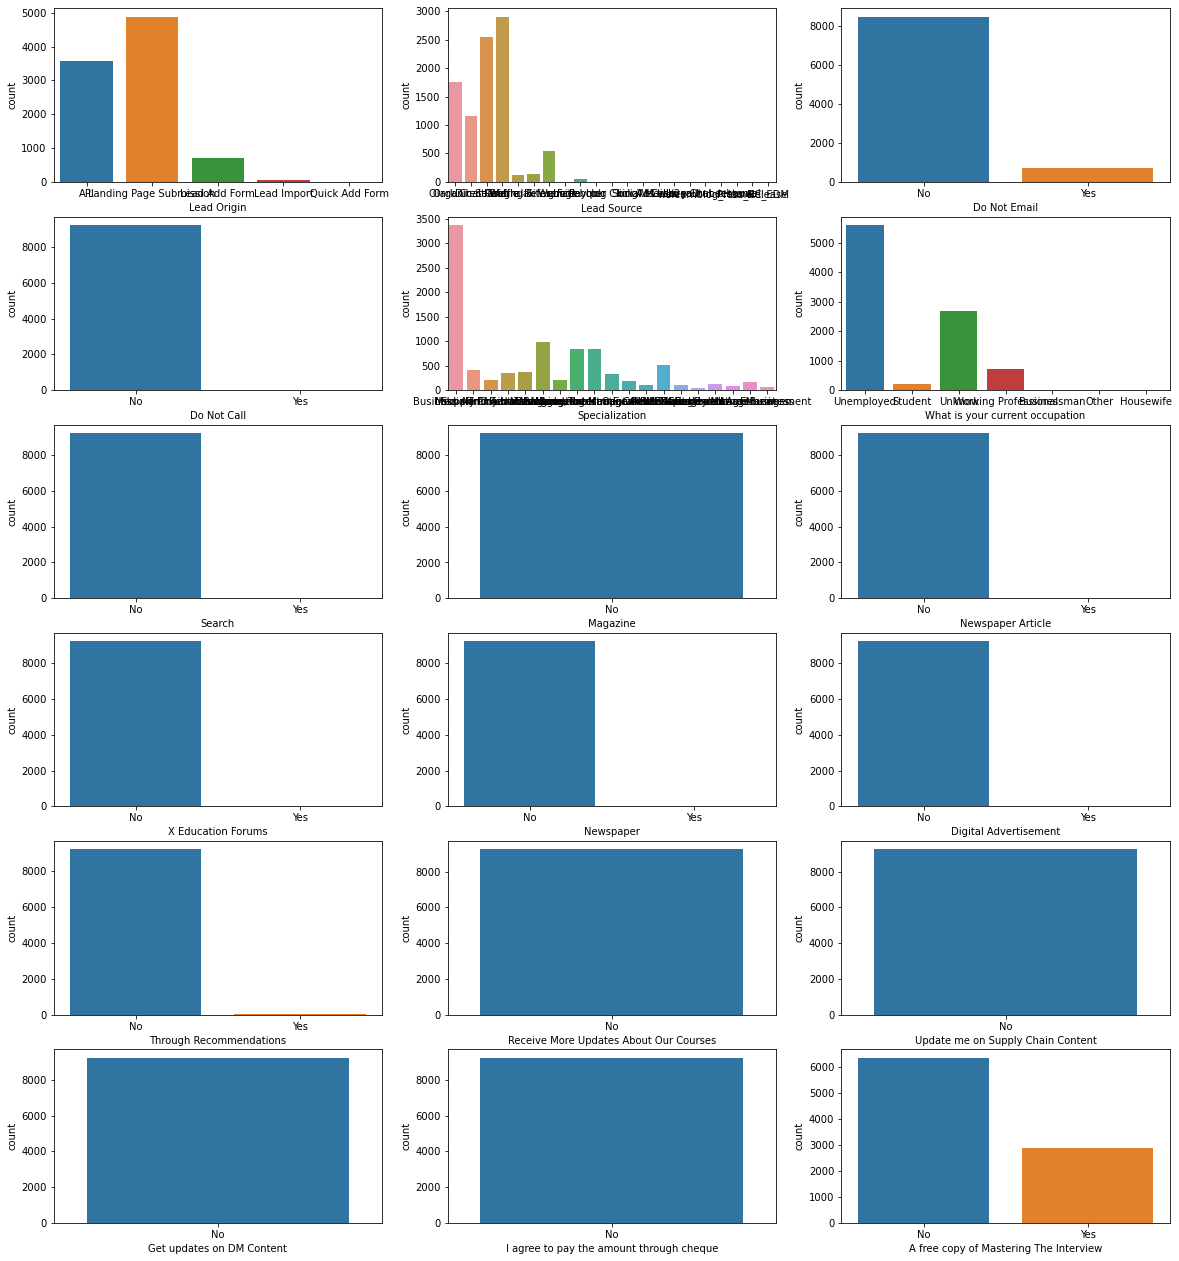

In [84]:
# Visualizing categorical variables
plt.figure(figsize=[20,30])
for i,j in enumerate (categorical_var):
    plt.subplot(8,3,i+1)
    ax=sns.countplot(x=j,data=lead_data)

<font color='blue'>
    As we can see 4 variable having more than 2 unique values .<br>
    Lets check the unique values in these variables.<br>
    We can also see a lot of categorical variables are highly skewed which should be dropped.

In [85]:
# Checking each variable one by one Lead Origin,Lead Source,Specialization,What is your current occupation
round(lead_data['Lead Origin'].value_counts(normalize=True)*100,2)

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

In [86]:
# Lead Source
round(lead_data['Lead Source'].value_counts(normalize=True)*100,2)

Google               31.43
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

In [87]:
# Specialization
round(lead_data['Specialization'].value_counts(normalize=True)*100,2)

Unknown                              36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

In [88]:
# What is your current occupation
round(lead_data['What is your current occupation'].value_counts(normalize=True)*100,2)

Unemployed              60.61
Unknow                  29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

<font color='blue'>
    We can see Lead Source have high number of categories with lower percentage.<br>
    Lets do convert lower percentage categorical values with name as others.<br>
    This process will make it ease while creating dummy variables.

In [89]:
# Creating a category 'Other Source' having percentage lower than 0.5 for Lead Source.
lead_data['Lead Source'].replace(lead_data['Lead Source'].value_counts()[lead_data['Lead Source'].value_counts()<=6].index.tolist(),'Other Source',inplace=True)

In [90]:
# Checking unique values
lead_data['Lead Source'].value_counts()

Google              2904
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Other Source          28
Name: Lead Source, dtype: int64

## Dropping Highly Skewed variables:

In [91]:
# Check all columns
lead_data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [92]:
# Dropping highly skewed columns: 
lead_data.drop(['Search', 'Magazine','Do Not Email','Do Not Call',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',],1,inplace=True)

In [93]:
#Checking dataset
lead_data.shape

(9240, 10)

In [94]:
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,Unknown,Unemployed,No
1,660728,API,Organic Search,0,5.0,674,2.5,Unknown,Unemployed,No
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,No
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unknown,Unemployed,No


## Analyzing Outliers :

In [95]:
# Checking for outliers
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


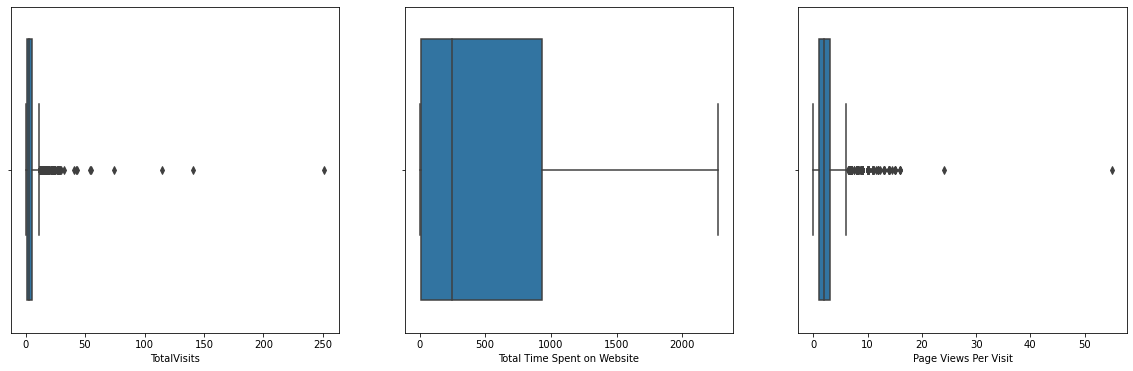

In [96]:
# We can see some outliers in our dataset as we have observed earlier as well.
# Plot a boxplot to analyse further
plt.figure(figsize=[20,6])
for i,j in enumerate(['TotalVisits','Total Time Spent on Website','Page Views Per Visit']):
    plt.subplot(1,3,i+1)
    ax=sns.boxplot(lead_data[j],orient="v")
plt.show()

In [97]:
# Clearly we can observe 'TotalVisits' and 'Page Views Per Visit' have some outliers
# Describe the percentile
lead_data[['TotalVisits','Page Views Per Visit']].describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])

,TotalVisits,Page Views Per Visit
count,9240.000000,9240.000000
mean,3.438636,2.357440
std,4.819024,2.145781
min,0.000000,0.000000
1%,0.000000,0.000000
5%,0.000000,0.000000
10%,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000


In [98]:
# 99% of data for both variables seems to be distributed well.
# We can use capping technique rather than removing rows for outliers . We can use 99% percentile value to replace outliers.
lead_data['TotalVisits']=lead_data['TotalVisits'].apply(lambda x : 17 if x>=17 else x)
lead_data['Page Views Per Visit']=lead_data['Page Views Per Visit'].apply(lambda x : 9 if x>=9 else x)

In [99]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.327814,487.698268,2.329050
std,23405.995698,0.486714,3.228466,548.021466,1.971347
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,17.000000,2272.000000,9.000000


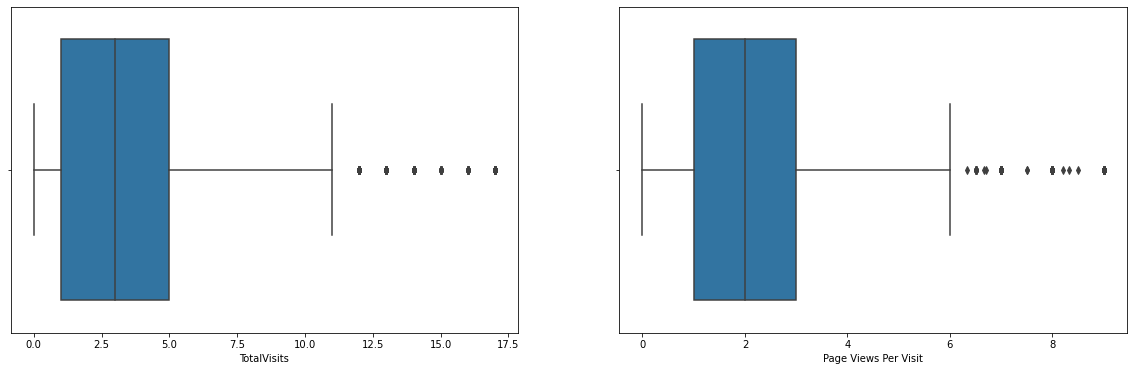

In [100]:
# Plot again to verify
plt.figure(figsize=[20,6])
for i,j in enumerate(['TotalVisits','Page Views Per Visit']):
    plt.subplot(1,2,i+1)
    ax=sns.boxplot(lead_data[j],orient="v")
plt.show()

<Font color='blue'>
    Now its seems be in its range.<br>
    We can perform EDA now as we have cleaned the data by treating missing values,dropping unwanted columns and outlier 
    treatment.<br>
    Now dataset is ready for analysis.

## Analysing Data Imbalance ratio:


In [101]:
# Conversion ratio
round(lead_data['Converted'].value_counts()/lead_data.shape[0]*100)

0    61.0
1    39.0
Name: Converted, dtype: float64

<font color='blue'> We can see leads not converted are higher compared to leads converted.

## EDA 

### Performing categorical variable analysis with respect to converted lead

In [102]:
# Create a list for cat variable
cat_var=lead_data.select_dtypes(include=['object']).columns.tolist()

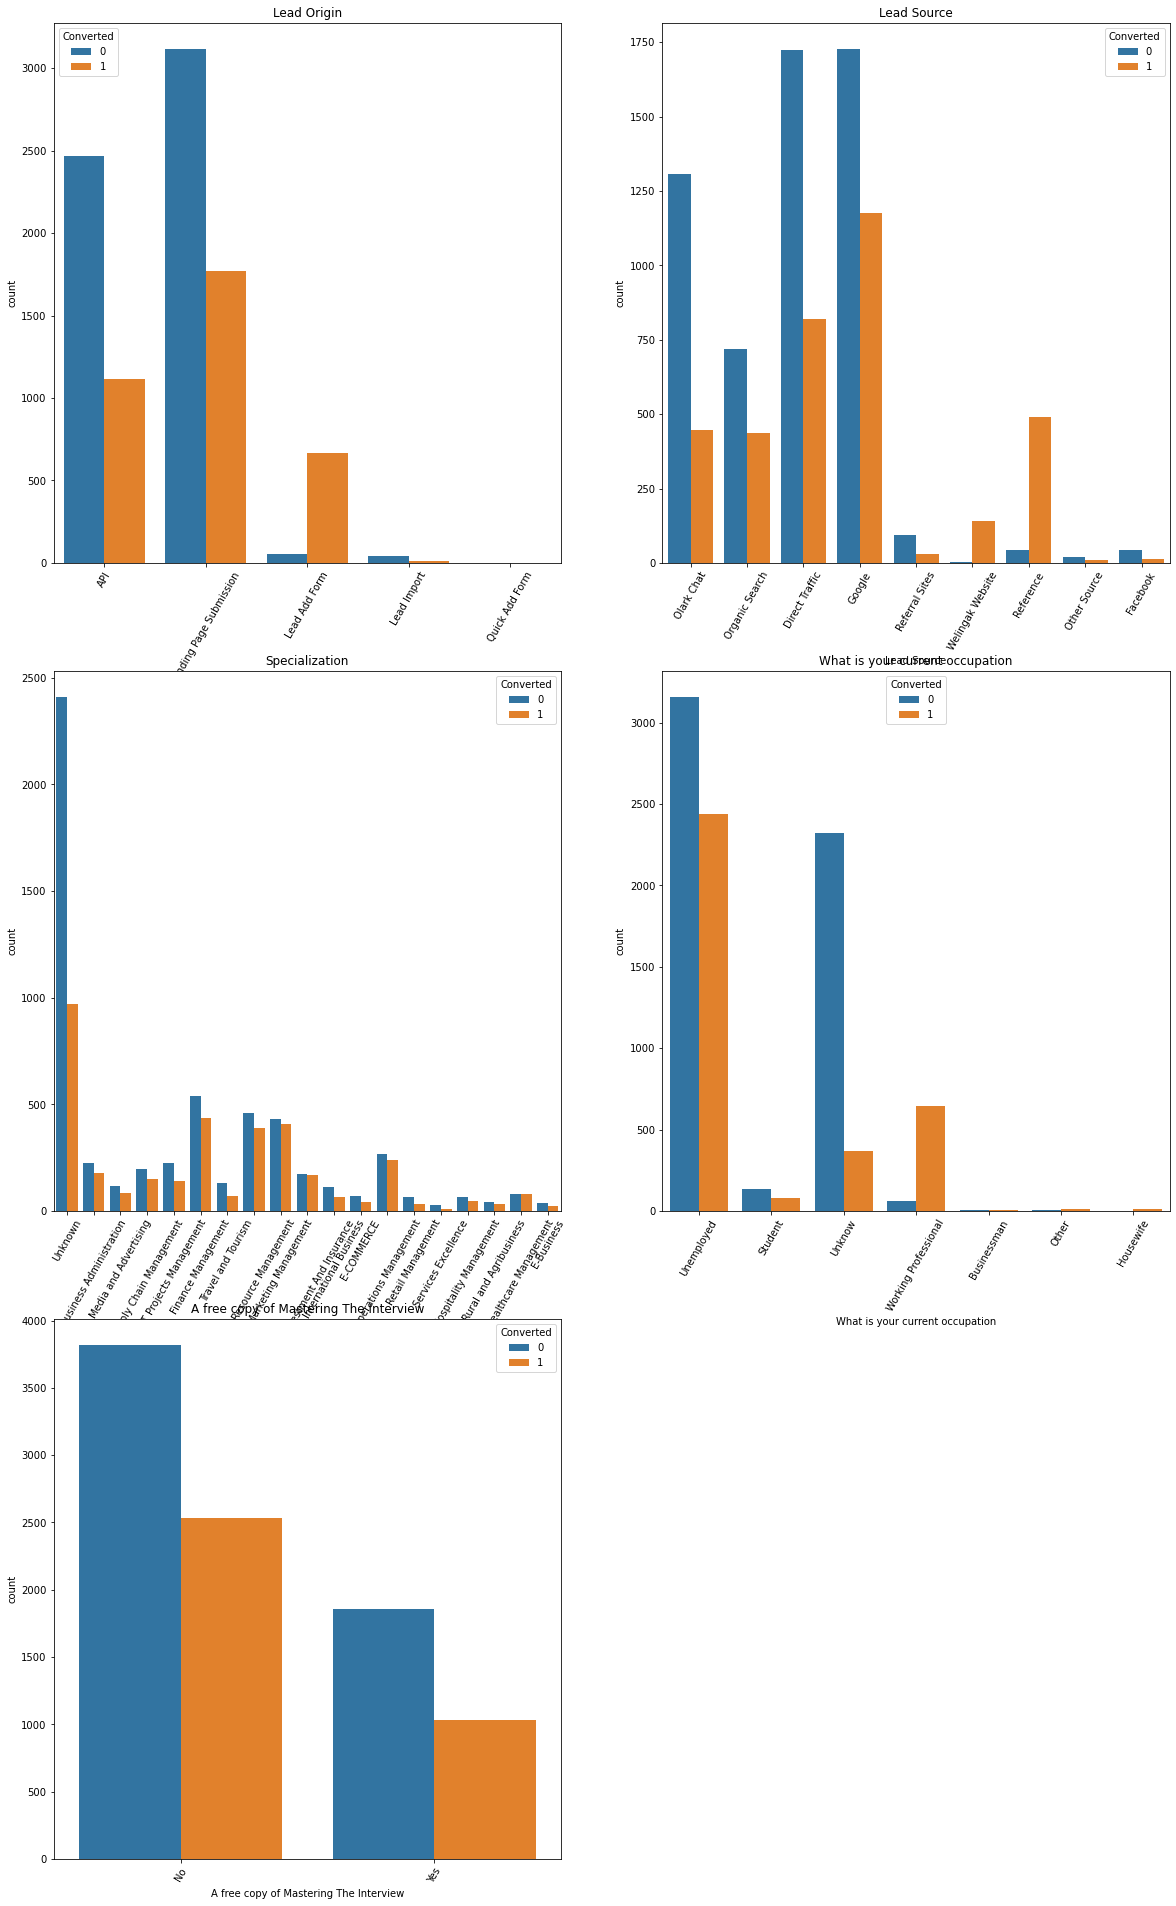

In [103]:
# Visualise:

plt.figure(figsize=[20,15])
for i,j in enumerate(cat_var):
    plt.subplot(3,2,i+1)
    ax=sns.countplot(x=j,hue='Converted',data=lead_data)
    ax.set_title(j)
    plt.xticks(rotation=60)
    plt.subplots_adjust(bottom=0.1,top=1.8)

<Font color='blue'> 
    So Far :<br>
    1-As we know lead not converted is higher in percentage, hence with each variable not converted associated high in 
    value.However,some categories in that variable doing well in making lead positive.<br>
    2-From lead origin, although quantity is low Lead Add Form has higher number of positive leads.<br>
    3-Reference and welingak website doing really well in lead source category,conversion rate is higher compartively 
    others.This is quite natural as well people join more with reference.This might gives assurity to join any course.<br>
    4-Working professional seems higher conversion rate among other occupations.Unemployed
    as well seems higher conversion rate.<br>
    5-In specialization category its seems from all sector lead conversion rate is almost 50%.<br>
    6-Overall we can say some of these categories would be help in predicting leads. 

### Performing Numerical variable analysis with respect to converted lead

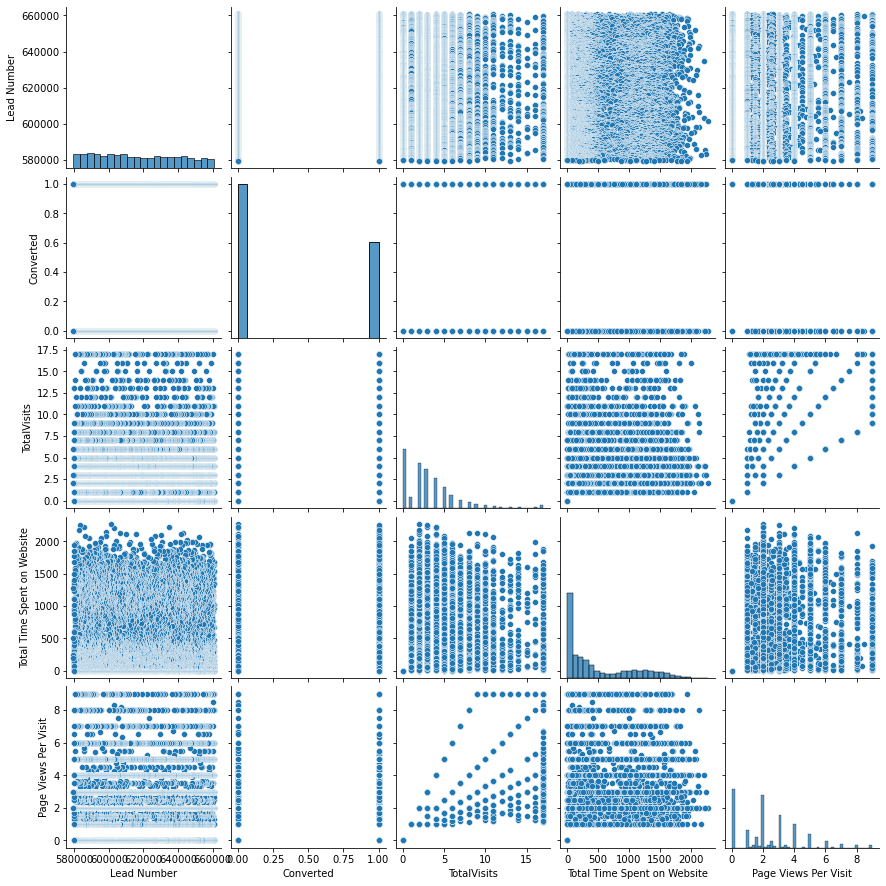

In [104]:
# Visualise using pairplot
sns.pairplot(lead_data)
plt.show()

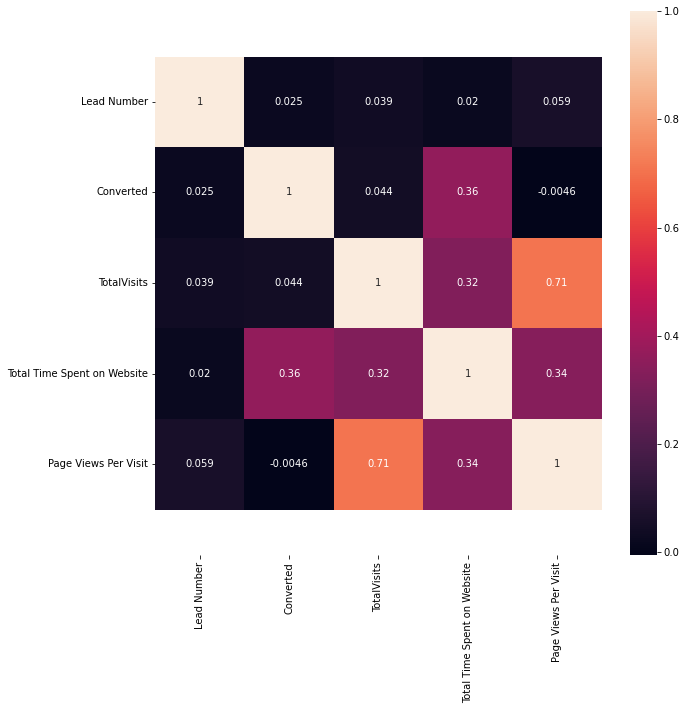

In [105]:
# Visualising using heatmap for corelation
plt.figure(figsize=[10,10])
ax=sns.heatmap(lead_data.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

<Font color='blue'> 
    So Far :<br>
    1-It can be clearly seen from Heatmap and Pairplot that there is strong relation between Total visits and Page view 
    per visits.This should be normal as both variables are dependent on each other. <br>
    2-There is some positive relation between Converted with Total Time Spent on website .It seems promising in positive 
    lead convertion rate.

##### We can see Categorical variable (lead origin,Lead Source,Specialization,What is your current occupation) and numerical variable( Total Time Spent on website) would be significant in predicting leading score.

### Preparing data for Model building:

In [106]:
# Assign 0 and 1 for binary categorical variable (Yes/No)
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,Unknown,Unemployed,No
1,660728,API,Organic Search,0,5.0,674,2.5,Unknown,Unemployed,No
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,No
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unknown,Unemployed,No


In [107]:
# A free copy of Mastering The Interview is binary variables.
lead_data['A free copy of Mastering The Interview']=lead_data['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})

In [108]:
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,Unknown,Unemployed,0
1,660728,API,Organic Search,0,5.0,674,2.5,Unknown,Unemployed,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,1
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unknown,Unemployed,0


### Creating Dummy Variables

In [109]:
# Creating dummy variable for Lead Origin
Dummy_var=pd.get_dummies(lead_data[['Lead Origin','Lead Source','Specialization','What is your current occupation']])
Dummy_var

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknow,What is your current occupation_Working Professional
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9236,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9237,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9238,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [111]:
# Drop one dummy variable from each dummy variable created.
drop_var=['Lead Origin_Quick Add Form','Lead Source_Other Source','Specialization_Unknown','What is your current occupation_Unknow']
Dummy_var.drop(drop_var,1,inplace=True)

In [112]:
# Concatinate with lead dataset.
lead_data=pd.concat([lead_data,Dummy_var],1)

In [113]:
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737,API,Olark Chat,0,0.0,0,0.0,Unknown,Unemployed,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,660728,API,Organic Search,0,5.0,674,2.5,Unknown,Unemployed,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unknown,Unemployed,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [114]:
# Drop the variables whose dummy variables are created.
lead_data.drop(['Lead Origin','Lead Source','Specialization','What is your current occupation'],1,inplace=True)

In [115]:
lead_data.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737,0,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,660728,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,660727,1,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,660719,0,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,660681,1,2.0,1428,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [116]:
# Checking data info
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 42 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_API                                       9240 non-null   uint8  
 7   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 8   Lead Origin_Lead Add Form                             9240

## Splitting the Data into Training and Testing Sets

#### Now our target variable or dependent variable is Converted , lets split the data in training and test sets

In [117]:
# Importing library
from sklearn.model_selection import train_test_split

In [118]:
# Splitting Dataset
df_train,df_test=train_test_split(lead_data,train_size = 0.7, test_size = 0.3, random_state = 100)

In [119]:
# Checking train set head
df_train.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,641410,0,0.0,0,0.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,597687,0,4.0,487,1.33,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3516,626825,0,5.0,106,2.50,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8105,587928,0,5.0,1230,5.00,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3934,622366,0,0.0,0,0.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<font color='blue'> We know TotalVisits, Total Time Spent on Website,Page Views Per Visit is on different scale value compared to other columns which are in binary scale, so we can use rescaling to get the coefficients comparable with other variable coefficients.

In [120]:
# Importing min_max scaler
from sklearn.preprocessing import StandardScaler

In [121]:
# Creating Scaler object
scaler=StandardScaler()

In [122]:
# Defining a variable var_for_scaling
var_for_scaling=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
df_train[var_for_scaling]=scaler.fit_transform(df_train[var_for_scaling])

In [123]:
df_train.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,641410,0,-1.022595,-0.885371,-1.180474,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,597687,0,0.205373,0.005716,-0.503379,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3516,626825,0,0.512365,-0.691418,0.092260,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8105,587928,0,0.512365,1.365219,1.364995,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3934,622366,0,-1.022595,-0.885371,-1.180474,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [124]:
df_train.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,6468.000000,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,617186.001546,0.381262,-1.346411e-16,-1.609377e-16,-4.136731e-17,0.311843,0.387137,0.528139,0.079468,0.005102,0.271490,0.005102,0.320037,0.190167,0.121058,0.060297,0.014224,0.014069,0.035096,0.043599,0.005720,0.012987,0.105442,0.015615,0.013451,0.091682,0.037260,0.018707,0.093383,0.020563,0.057205,0.010823,0.007267,0.004793,0.037570,0.021336,0.000928,0.001391,0.001237,0.021027,0.605133,0.077613
std,23372.003514,0.485734,1.000077e+00,1.000077e+00,1.000077e+00,0.463282,0.487133,0.499246,0.270489,0.071252,0.444763,0.071252,0.466527,0.392463,0.326219,0.238054,0.118422,0.117786,0.184036,0.204218,0.075423,0.113227,0.307146,0.123991,0.115204,0.288599,0.189414,0.135500,0.290991,0.141926,0.232251,0.103475,0.084940,0.069069,0.190168,0.144512,0.030445,0.037279,0.035150,0.143484,0.488860,0.267582
min,579533.000000,0.000000,-1.022595e+00,-8.853708e-01,-1.180474e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596516.250000,0.000000,-7.156027e-01,-8.634138e-01,-6.713803e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615720.500000,0.000000,-1.016187e-01,-4.352528e-01,-1.622866e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,637348.750000,1.000000,5.123653e-01,8.098906e-01,3.468071e-01,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000

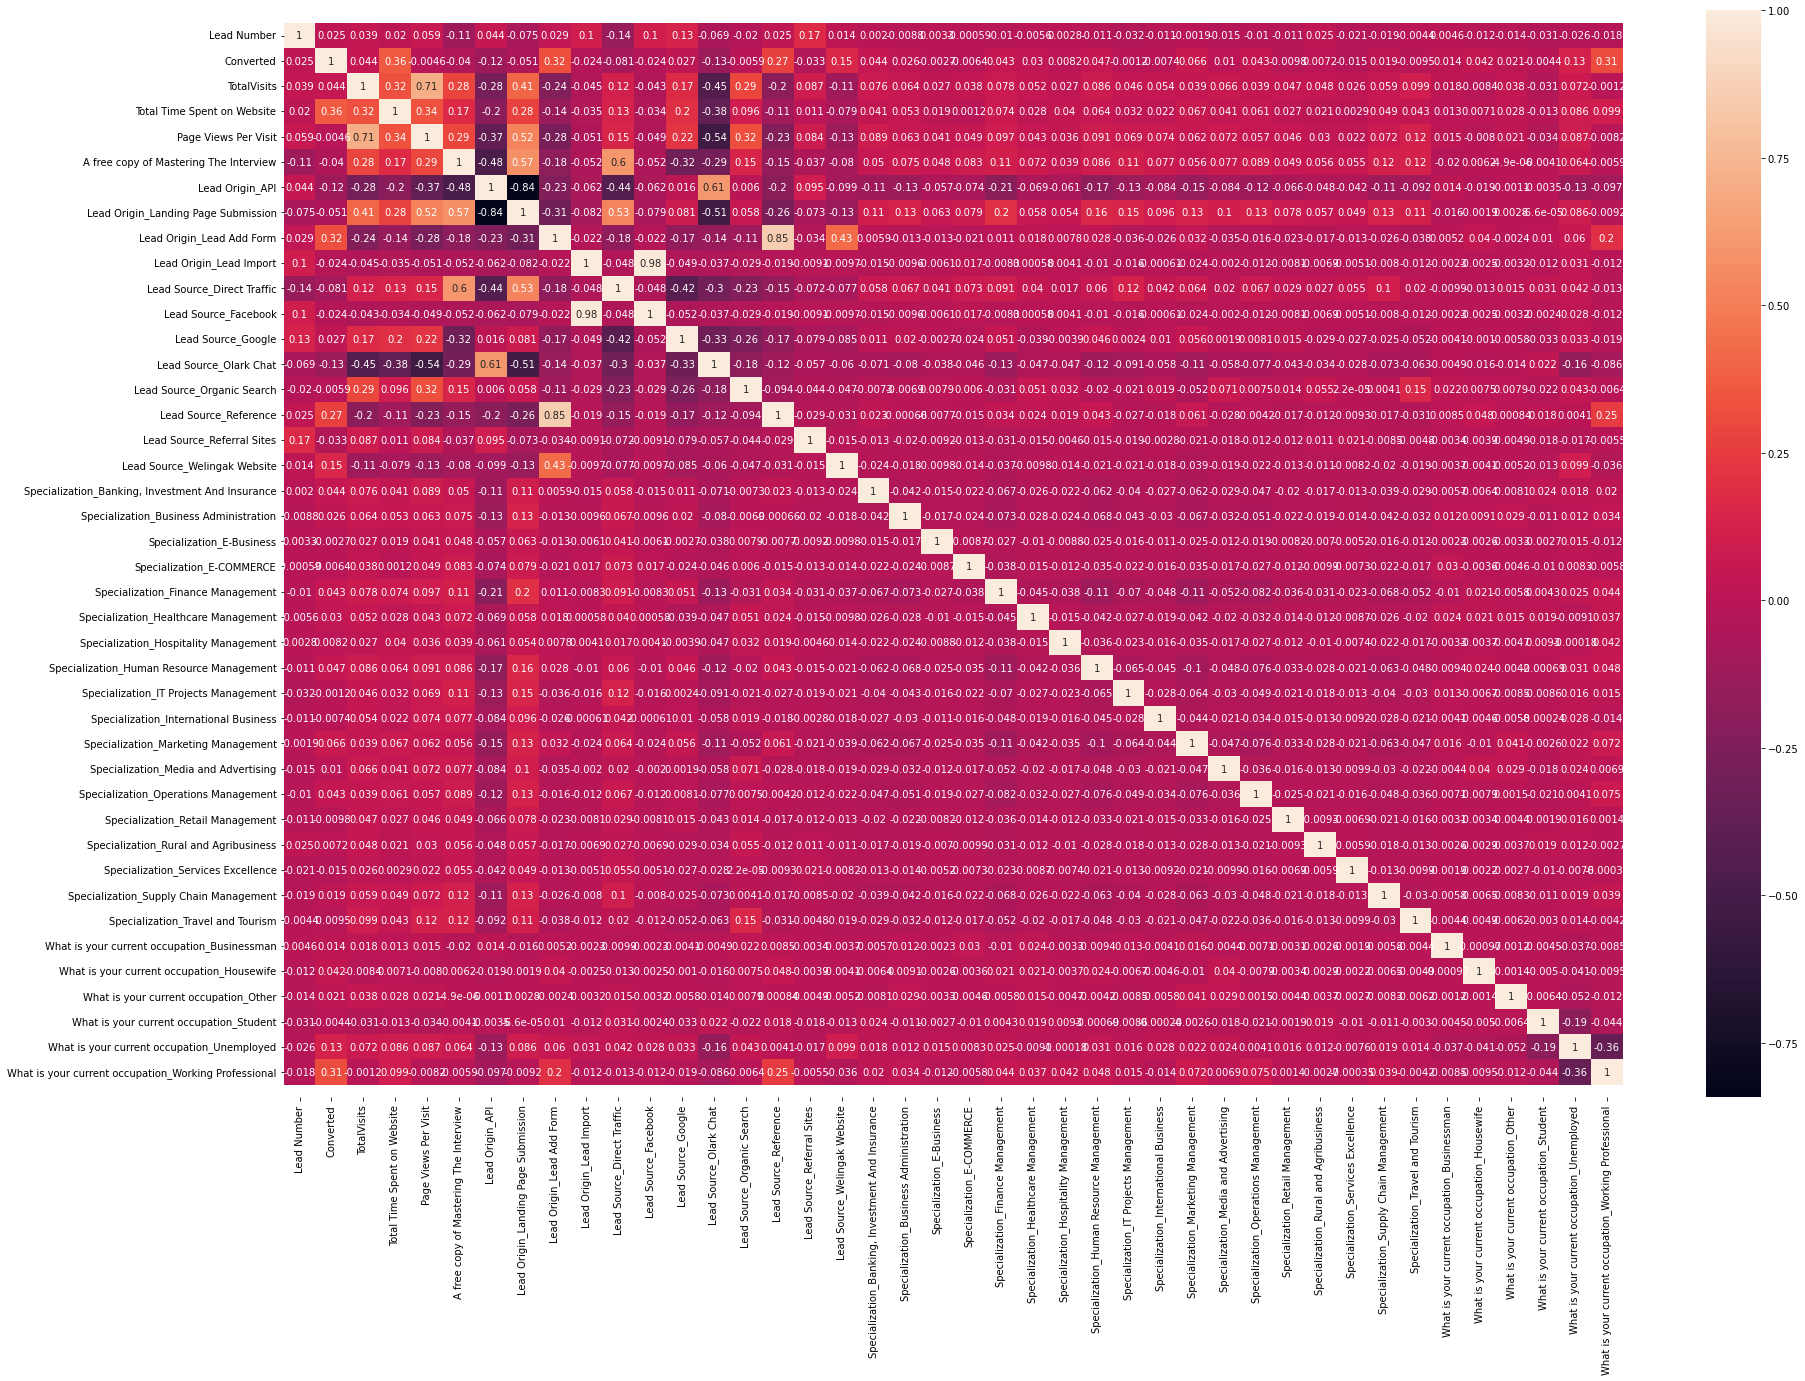

In [125]:
# Checking corelation
plt.figure(figsize=[30,20])
ax=sns.heatmap(lead_data.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [126]:
# We can see some of the highly correlated variables, lets drop it later while checking VIF in model building.

## Building Models

### 1st Model: (splitting our data into a training set and a test set)

In [127]:
# Importing library
import statsmodels.api as sm

In [128]:
# Split df_train dataset into X_train and y_train dataset.
X_train=df_train.drop(['Converted','Lead Number'],1)
y_train=df_train['Converted']

In [129]:
# Building Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2869.8
Date:                Sun, 26 Feb 2023   Deviance:                       5739.6
Time:                        11:39:11   Pearson chi2:                 7.73e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3572
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   16.6535   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
TotalVisits                                              0.1923      0.045      4.300      0.000       0.105       0.280
Total Time Spent on Website                              1.0813      0.038     28.148      0.000       1.006       1.157
Page Views Per Visit                                    -0.1040      0.052     -1.999      0.046      -0.206      -0.002
A free copy of Mastering The Interview                  -0.1932      0.102     -1.895      0.058      -0.393       0.007
Lead Origin_API                                        -18.7603   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Landing Page Submission                    -19.4600   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                              -16.0486   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Import                                -19.0346   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Direct Traffic                              -0.2493      0.576     -0.433      0.665      -1.379       0.880
Lead Source_Facebook                                    -0.2079      2.418     -0.086      0.931      -4.947       4.531
Lead Source_Google                                       0.0421      0.572      0.074      0.941      -1.079       1.163
Lead Source_Olark Chat                                   0.9456      0.584      1.620      0.105      -0.198       2.089
Lead Source_Organic Search                              -0.0803      0.578     -0.139      0.890      -1.214       1.053
Lead Source_Reference                                    0.4574      0.689      0.664      0.507      -0.893       1.808
Lead Source_Referral Sites                              -0.4818      0.645     -0.747      0.455      -1.747       0.783
Lead Source_Welingak Website                             2.8247      0.975      2.898      0.004       0.914       4.735
Specialization_Banking, Investment And Insurance         1.1411      0.206      5.535      0.000       0.737       1.545
Specialization_Business Administration                   0.8113      0.196      4.147      0.000       0.428       1.195
Specialization_E-Business                                0.9024      0.431      2.094      0.036       0.058       1.747
Specialization_E-COMMERCE                                1.2438      0.301      4.132      0.000       0.654       1.834
Specialization_Finance Management                        1.0711      0.153      7.002      0.000       0.771       1.371
Specialization_Healthcare Management                     1

### Feature Selection Using RFE

In [133]:
# Using Feature Selection RFE method to eliminate some highly corelated variable.
# Run RFE with the output number of the variable equal to 15
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# Define lm model name
logr = LogisticRegression()
rfe = RFE(logr, step = 15)             
rfe = rfe.fit(X_train, y_train)

In [134]:
rfe.support_

array([False,  True, False, False, False,  True,  True, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False,  True, False, False, False, False,  True,
       False,  True,  True,  True])

In [135]:
# Ranking choosen by RFE to features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('A free copy of Mastering The Interview', False, 3),
 ('Lead Origin_API', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Direct Traffic', False, 3),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_E-Business', False, 2),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 

In [136]:
# Top 15 features ranking from RFE.
# Assign a var for keeping all these 15 feature
Top_feature = X_train.columns[rfe.support_]
Top_feature

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### 2nd Model After using RFE

###### Now we have top features and lets starts building model by using statsmodel to understand the statistic

In [137]:
# We know for using statsmodel we need to add constant to our independent variable ,lets do the same.
X_train_sm = sm.add_constant(X_train[Top_feature])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2905.8
Date:                Sun, 26 Feb 2023   Deviance:                       5811.6
Time:                        11:47:32   Pearson chi2:                 7.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3500
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0685      0.097    -21.289      0.000      -2.259      -1.878
Total Time Spent on Website                              1.0979      0.038     28.864      0.000       1.023       1.172
Lead Origin_Landing Page Submission                     -0.5701      0.100     -5.722      0.000      -0.765      -0.375
Lead Origin_Lead Add Form                                3.1547      0.194     16.252      0.000       2.774       3.535
Lead Source_Olark Chat                                   0.9023      0.112      8.025      0.000       0.682       1.123
Lead Source_Welingak Website                             2.2722      0.738      3.081      0.002       0.827       3.718
Specialization_Banking, Investment And Insurance         0.8184      0.184      4.438      0.000       0.457       1.180
Specialization_Business Administration                   0.4800      0.174      2.758      0.006       0.139       0.821
Specialization_E-COMMERCE                                0.8023      0.284      2.829      0.005       0.246       1.358
Specialization_Finance Management                        0.7257      0.124      5.837      0.000       0.482       0.969
Specialization_Healthcare Management                     0.7135      0.269      2.652      0.008       0.186       1.241
Specialization_Human Resource Management                 0.5100      0.129      3.956      0.000       0.257       0.763
Specialization_IT Projects Management                    0.6947      0.179      3.873      0.000       0.343       1.046
Specialization_Marketing Management                      0.5342      0.126      4.225      0.000       0.286       0.782
Specialization_Media and Advertising                     0.7488      0.229      3.272      0.001       0.300       1.197
Specialization_Operations Management                     0.5965      0.155      3.852      0.000       0.293       0.900
Specialization_Rural and Agribusiness                    0.9615      0.366      2.628      0.009       0.244       1.679
What is your current occupation_Housewife               23.6097   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
What is your current occupation_Student                  1.0665      0.223      4.783      0.000       0.629       1.504
What is your current occupation_Unemployed               1.2272      0.082     14.911      0.000       1.066       1.388
What is your current occupation_Working Professional     3.7094      0.193     19.227      0.000       3.331       4.088
========================================================================================================================
"""

##### We can see variable having high P value. Drop first 'What is your current occupation_Housewife' variable to check further.

In [140]:
# Dropping variable
Top_feature=Top_feature.drop('What is your current occupation_Housewife',1)
Top_feature

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### 3rd Model

In [141]:
# Adding constant and checking summary
X_train_sm = sm.add_constant(X_train[Top_feature])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.4
Date:                Sun, 26 Feb 2023   Deviance:                       5830.9
Time:                        11:58:18   Pearson chi2:                 7.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3481
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0491      0.097    -21.200      0.000      -2.239      -1.860
Total Time Spent on Website                              1.0965      0.038     28.880      0.000       1.022       1.171
Lead Origin_Landing Page Submission                     -0.5684      0.100     -5.711      0.000      -0.764      -0.373
Lead Origin_Lead Add Form                                3.1866      0.194     16.432      0.000       2.806       3.567
Lead Source_Olark Chat                                   0.8984      0.112      7.997      0.000       0.678       1.119
Lead Source_Welingak Website                             2.2461      0.738      3.045      0.002       0.800       3.692
Specialization_Banking, Investment And Insurance         0.8210      0.184      4.454      0.000       0.460       1.182
Specialization_Business Administration                   0.5029      0.173      2.900      0.004       0.163       0.843
Specialization_E-COMMERCE                                0.8038      0.283      2.837      0.005       0.248       1.359
Specialization_Finance Management                        0.7368      0.124      5.948      0.000       0.494       0.980
Specialization_Healthcare Management                     0.7633      0.267      2.856      0.004       0.240       1.287
Specialization_Human Resource Management                 0.5275      0.129      4.104      0.000       0.276       0.779
Specialization_IT Projects Management                    0.6969      0.179      3.889      0.000       0.346       1.048
Specialization_Marketing Management                      0.5359      0.126      4.240      0.000       0.288       0.784
Specialization_Media and Advertising                     0.7874      0.227      3.464      0.001       0.342       1.233
Specialization_Operations Management                     0.5988      0.155      3.870      0.000       0.296       0.902
Specialization_Rural and Agribusiness                    0.9652      0.366      2.640      0.008       0.249       1.682
What is your current occupation_Student                  1.0399      0.223      4.664      0.000       0.603       1.477
What is your current occupation_Unemployed               1.1999      0.082     14.713      0.000       1.040       1.360
What is your current occupation_Working Professional     3.6796      0.193     19.105      0.000       3.302       4.057
========================================================================================================================
"""

##### Now we can see p value is under 0.05 ,lets predict the value on train set

In [142]:
# Predicted value on train set
y_train_pred=res.predict(X_train_sm)
y_train_pred[:15]

1871    0.404752
6795    0.196012
3516    0.329828
8105    0.519797
3934    0.284627
4844    0.973597
3297    0.222234
8071    0.993525
987     0.200239
7423    0.788472
1032    0.713014
6542    0.112301
4317    0.168579
6472    0.262287
712     0.179892
dtype: float64

In [143]:
# Create array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:15]

array([0.40475234, 0.19601175, 0.329828  , 0.51979691, 0.28462692,
       0.97359672, 0.22223378, 0.99352477, 0.20023856, 0.78847163,
       0.71301442, 0.11230082, 0.16857942, 0.26228658, 0.17989206])

#### Checking with actual converted lead with prediction

In [145]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_Prob,Lead Number
0,0,0.404752,1871
1,0,0.196012,6795
2,0,0.329828,3516
3,0,0.519797,8105
4,0,0.284627,3934
5,1,0.973597,4844
6,0,0.222234,3297
7,1,0.993525,8071
8,0,0.200239,987
9,1,0.788472,7423


#### Creating new column 'predicted' with 1 if Converted_Prob> 0.5 else 0

In [146]:
# Creating new coloumn
y_train_pred_final['predicted']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0 )

In [147]:
# Checking predicted dataset
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.404752,1871,0
1,0,0.196012,6795,0
2,0,0.329828,3516,0
3,0,0.519797,8105,1
4,0,0.284627,3934,0


### Matrics by importing matrics library

In [148]:
from sklearn import metrics

In [149]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3563  439]
 [ 883 1583]]


In [150]:
# Overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7956091527520099


#### Checking the VIFs

In [151]:
# VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [152]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[Top_feature].columns
vif['VIF'] = [variance_inflation_factor(X_train[Top_feature].values, i) for i in range(X_train[Top_feature].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,3.62
17,What is your current occupation_Unemployed,2.33
2,Lead Origin_Lead Add Form,1.71
8,Specialization_Finance Management,1.51
10,Specialization_Human Resource Management,1.43
12,Specialization_Marketing Management,1.40
3,Lead Source_Olark Chat,1.36
18,What is your current occupation_Working Profes...,1.35
14,Specialization_Operations Management,1.27
4,Lead Source_Welingak Website,1.26


<font color='blue'>
    So Far:<br>
    1- We can see VIFs for all variable are under control and can say not such strong correlation exist between variables 
    now.<br>
    2- P value for the 3rd model is in range and we can say this model is fit not by chance.<br>
    3- Accuracy is also good however we must check some other matrics as well besides this accuracy.

### Checking other matrics

In [153]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [154]:
# Check the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6419302514193025

In [155]:
# Calculate specificity
TN / float(TN+FP)

0.8903048475762119

In [156]:
# Calculate false postive rate - predicting Converted when lead does not converted
print(FP/ float(TN+FP))

0.1096951524237881


In [157]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7828882294757665


In [158]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8013945119208277


### Plotting the ROC Curve
<font color='blue'> ROC curve demonstrates several things:<br>
    1-It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a 
    decrease in specificity).<br>
    2-The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.<br>
    3-The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [159]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [160]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

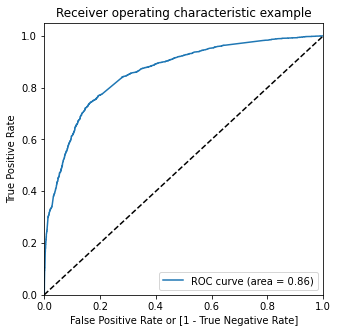

In [161]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

##### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [162]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.404752,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.196012,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.329828,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.519797,8105,1,1,1,1,1,1,1,0,0,0,0
4,0,0.284627,3934,0,1,1,1,0,0,0,0,0,0,0


In [163]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.496753  0.984185  0.196402
0.2   0.2  0.697124  0.900243  0.571964
0.3   0.3  0.791589  0.767640  0.806347
0.4   0.4  0.801020  0.712084  0.855822
0.5   0.5  0.795609  0.641930  0.890305
0.6   0.6  0.784168  0.571776  0.915042
0.7   0.7  0.764224  0.477697  0.940780
0.8   0.8  0.731756  0.340633  0.972764
0.9   0.9  0.695578  0.212084  0.993503


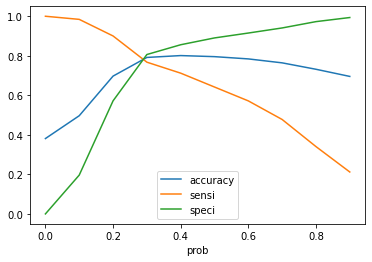

In [164]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### According to the curve above, the optimul point is close to 0.28.We must create a model with high sensitivity, though, as we don't want to leave out variable with a high conversion probability.We will therefore use 0.3 as the cutoff probability.

In [165]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head(10)

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.404752,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.196012,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.329828,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.519797,8105,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.284627,3934,0,1,1,1,0,0,0,0,0,0,0,0
5,1,0.973597,4844,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0.222234,3297,0,1,1,1,0,0,0,0,0,0,0,0
7,1,0.993525,8071,1,1,1,1,1,1,1,1,1,1,1,1
8,0,0.200239,987,0,1,1,1,0,0,0,0,0,0,0,0
9,1,0.788472,7423,1,1,1,1,1,1,1,1,1,0,0,1


In [166]:
# Overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7915893630179345

In [167]:
# Creating Confusion Matrics
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3227,  775],
       [ 573, 1893]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.767639902676399

In [170]:
# Calculate specificity
TN / float(TN+FP)

0.8063468265867066

In [171]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19365317341329336


In [172]:
# Positive predictive value 
print (TP / float(TP+FP))

0.70952023988006


In [173]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8492105263157895


### Precision and Recall tradeoff

In [174]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [175]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

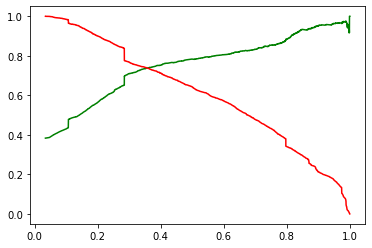

In [176]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [177]:
# Checking test dataset
df_test.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,619003,1,8.0,1011,8.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,636884,1,0.0,0,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7766,590281,1,5.0,59,5.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9199,579892,0,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4359,617929,1,0.0,0,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [178]:
# Defining a variable var_for_scaling and scaling for test dataset
var_for_scaling=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
df_test[var_for_scaling]=scaler.transform(df_test[var_for_scaling])

In [179]:
df_test.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.00000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,617194.115079,0.395022,-0.003275,0.023314,0.017435,0.314214,0.388167,0.530303,0.073593,0.007937,0.283911,0.007937,0.300866,0.189394,0.133838,0.051948,0.011905,0.018398,0.040043,0.043651,0.007215,0.010101,0.106061,0.020924,0.009740,0.091991,0.045094,0.020563,0.084416,0.025253,0.047980,0.010823,0.00938,0.003247,0.038240,0.023449,0.000722,0.000361,0.002886,0.026696,0.608225,0.073593
std,23489.343546,0.488944,0.970050,1.008922,1.011850,0.464286,0.487421,0.499171,0.261155,0.088749,0.450975,0.088749,0.458717,0.391892,0.340540,0.221962,0.108477,0.134411,0.196096,0.204354,0.084649,0.100013,0.307971,0.143154,0.098229,0.289066,0.207547,0.141941,0.278060,0.156919,0.213762,0.103485,0.09641,0.056898,0.191809,0.151351,0.026856,0.018993,0.053654,0.161221,0.488235,0.261155
min,579546.000000,0.000000,-1.022595,-0.885371,-1.180474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596415.750000,0.000000,-0.715603,-0.861584,-0.671380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615050.500000,0.000000,-0.101619,-0.413296,-0.162287,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,637463.500000,1.000000,0.512365,0.851060,0.601354,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [180]:
# Spliting df_test dataset into X_test and y_test dataset.
X_test=df_test.drop(['Converted','Lead Number'],1)
y_test=df_test['Converted']

In [181]:
# Using Model 3 features for test dataset
X_test=X_test[Top_feature]

In [182]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

In [183]:
# Prediction on test dataset
y_test_pred = res.predict(X_test_sm)

In [184]:
y_test_pred[:10]

4269    0.270600
2376    0.796824
7766    0.685256
9199    0.284627
4359    0.870173
9186    0.415894
1631    0.594042
8963    0.217151
8007    0.103276
5324    0.176540
dtype: float64

In [186]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.270600
2376,0.796824
7766,0.685256
9199,0.284627
4359,0.870173


In [187]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [188]:
# Assigning Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [189]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [190]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [191]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.270600
1,1,2376,0.796824
2,1,7766,0.685256
3,0,9199,0.284627
4,1,4359,0.870173


In [192]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [193]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [194]:
# y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,4269,1,0.270600
1,2376,1,0.796824
2,7766,1,0.685256
3,9199,0,0.284627
4,4359,1,0.870173


In [195]:
# Creating var final_predicted with prob higher than 0.3
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [196]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,4269,1,0.270600,0
1,2376,1,0.796824,1
2,7766,1,0.685256,1
3,9199,0,0.284627,0
4,4359,1,0.870173,1


In [197]:
# Overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7857142857142857

In [198]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1339,  338],
       [ 256,  839]], dtype=int64)

In [199]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [200]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.7662100456621005

In [201]:
# Calculate specificity
TN / float(TN+FP)

0.7984496124031008

### Generate lead score for each lead

In [202]:
# Check test dataset
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.404752,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.196012,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.329828,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.519797,8105,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.284627,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [203]:
# Creating new var for storing only converted probability and lead number var
y_train_lead_score=y_train_pred_final[['Lead Number','Converted_Prob']]

In [204]:
# Test data set
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,4269,1,0.270600,0
1,2376,1,0.796824,1
2,7766,1,0.685256,1
3,9199,0,0.284627,0
4,4359,1,0.870173,1


In [205]:
# Creating new var for storing only converted probability and lead number var of test dataset
y_test_lead_score=y_pred_final[['Lead Number','Converted_Prob']]

In [206]:
# Appending two dataset 
final_lead_score=pd.concat([y_train_lead_score,y_test_lead_score],0,ignore_index=True, sort=True)

In [207]:
final_lead_score.head()

,Converted_Prob,Lead Number
0,0.404752,1871
1,0.196012,6795
2,0.329828,3516
3,0.519797,8105
4,0.284627,3934


In [208]:
# Creating new var Lead Score for assiging score
final_lead_score['Lead Score']=round(final_lead_score['Converted_Prob']*100,2)

In [209]:
# Dropping Converted_Prob var
final_lead_score.drop('Converted_Prob',1,inplace=True)

In [210]:
# Sorting with lead score 
final_lead_score.sort_values(by='Lead Score',ascending=False,inplace=True)

In [211]:
# Final lead score 
final_lead_score.head()

,Lead Number,Lead Score
3115,2656,99.96
7014,3478,99.96
4891,8074,99.95
7213,6383,99.92
6187,7579,99.92
